In [11]:
from bg_atlasapi import show_atlases
show_atlases()

╭───────────────────────────────── Brainglobe Atlases ─────────────────────────────────╮
│                                                                           Latest     │
│  Name                              Downloaded  Updated  Local version    version     │
│  allen_mouse_100um                     ✔          ✔          1.2           1.2       │
│  example_mouse_100um                                                       1.2       │
│  allen_mouse_10um                                                          1.2       │
│  allen_mouse_25um                                                          1.2       │
│  allen_mouse_50um                                                          1.2       │
│  mpin_zfish_1um                                                            1.0       │
│  allen_human_500um                                                         0.1       │
│  kim_mouse_10um                                                            1.0       │
│  kim_mouse_25um                                                            1.0       │
│  kim_mouse_50um                                                            1.0       │
│  kim_mouse_100um                                                           1.0       │
│  osten_mouse_10um                                                          1.1       │
│  osten_mouse_25um                                                          1.1       │
│  osten_mouse_50um                                                          1.1       │
│  osten_mouse_100um                                                         1.1       │
│  allen_cord_20um                                                           1.0       │
│  azba_zfish_4um                                                            1.1       │
│  whs_sd_rat_39um                                                           1.0       │
│  perens_lsfm_mouse_20um                                                    1.0       │
│  admba_3d_e11_5_mouse_16um                                                 1.0       │
│  admba_3d_e13_5_mouse_16um                                                 1.0       │
│  admba_3d_e15_5_mouse_16um                                                 1.0       │
│  admba_3d_e18_5_mouse_16um                                                 1.0       │
│  admba_3d_p4_mouse_16.752um                                                1.0       │
│  admba_3d_p14_mouse_16.752um                                               1.0       │
│  admba_3d_p28_mouse_16.752um                                               1.0       │
│  admba_3d_p56_mouse_25um                                                   1.0       │
│  princeton_mouse_20um                                                      1.0       │
╰──────────────────────────────────────────────────────────────────────────────────────╯

In [10]:
from bg_atlasapi.bg_atlas import BrainGlobeAtlas
atlas = BrainGlobeAtlas("allen_mouse_100um")

Bgatlas_api: allen_mouse_100um not found locally. Downloading...

Output()

In [12]:
atlas.lookup_df.head(8)

,acronym,id,name
0,root,997,root
1,grey,8,Basic cell groups and regions
2,CH,567,Cerebrum
3,CTX,688,Cerebral cortex
4,CTXpl,695,Cortical plate
5,Isocortex,315,Isocortex
6,FRP,184,"Frontal pole, cerebral cortex"
7,FRP1,68,"Frontal pole, layer 1"


In [34]:
obj_file = atlas.structures["SSp-m"]["mesh_filename"]
print(obj_file)

C:\Users\Daniel\.brainglobe\allen_mouse_100um_v1.2\meshes\345.obj


In [54]:
import pandas as pd
import numpy as np
obj_df = pd.read_csv(obj_file, header=None, delimiter=' ')
obj_df.drop([4,5], axis=1, inplace=True)
obj_df.drop([0],axis=0, inplace=True)
obj = obj_df.to_numpy()
obj

array([['v', '5183.28', '2958.53', '1312.51'],
       ['v', '5105.31', '2994.65', '1322.4'],
       ['v', '5167.8', '3023.52', '1304.63'],
       ...,
       ['f', '3135', '3140', '3149'],
       ['f', '3143', '3139', '3138'],
       ['f', '3146', '3147', '3145']], dtype=object)

In [64]:
verts = []
faces = []
with obj_file.open() as f:
    for line in f:
        if line[0] == 'v' and line[1] == ' ':
            verts.append(line[2:].split())
        if line[0] == 'f' and line[1] == ' ':
            faces.append(line[2:].split())

In [96]:
import napari

viewer = napari.Viewer()


In [102]:
import numpy as np
import nrrd
import matplotlib.pyplot as plt
readdata, header = nrrd.read(r"C:\Users\Daniel\Desktop\tmp\lab\structure_345.nrrd")

viewer.add_image(readdata, name='structure_345', colormap='green', blending='additive', opacity=0.5)

<Image layer 'structure_345 [1]' at 0x266129a69e0>

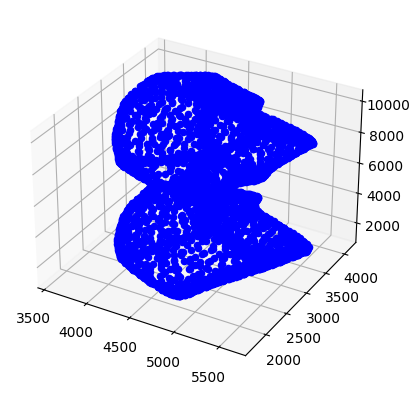

In [81]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d

verts = np.array(verts, dtype=np.float32)
faces = np.array(faces, dtype=np.int32)

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

#pc = art3d.Poly3DCollection(verts[faces], edgecolor="black")
for i in range(len(verts)):
    ax.scatter(verts[i,0], verts[i,1], verts[i,2], c='b', marker='o')


plt.show()